In [1]:
# Data Analytics Notebook
# Cell 1: imports and data load
import pandas as pd
import numpy as np

# Provide path to the CSV dataset placed in backend/app/data/products.csv
DATA_PATH = "../backend/app/data/products.csv"
df = pd.read_csv(DATA_PATH)

# quick look
df.head(5)

,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id
0,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",GOYMFK,"multiple shoes, coats, hats, and other items E...",$24.99,"['Home & Kitchen', 'Storage & Organization', '...",['https://m.media-amazon.com/images/I/416WaLx1...,GOYMFK,"2.36""D x 7.87""W x 21.6""H",China,Metal,White,02593e81-5c09-5069-8516-b0b29f439ded
1,"subrtex Leather ding Room, Dining Chairs Set o...",subrtex,subrtex Dining chairs Set of 2,NaN,"['Home & Kitchen', 'Furniture', 'Dining Room F...",['https://m.media-amazon.com/images/I/31SejUEW...,Subrtex Houseware INC,"18.5""D x 16""W x 35""H",NaN,Sponge,Black,5938d217-b8c5-5d3e-b1cf-e28e340f292e
2,Plant Repotting Mat MUYETOL Waterproof Transpl...,MUYETOL,NaN,$5.98,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/41RgefVq...,MUYETOL,"26.8""L x 26.8""W",NaN,Polyethylene,Green,b2ede786-3f51-5a45-9a5b-bcf856958cd8
3,"Pickleball Doormat, Welcome Doormat Absorbent ...",VEWETOL,The decorative doormat features a subtle textu...,$13.99,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/61vz1Igl...,Contrence,"24""L x 16""W",NaN,Rubber,A5589,8fd9377b-cfa6-5f10-835c-6b8eca2816b5
4,JOIN IRON Foldable TV Trays for Eating Set of ...,JOIN IRON Store,Set of Four Folding Trays With Matching Storag...,$89.99,"['Home & Kitchen', 'Furniture', 'Game & Recrea...",['https://m.media-amazon.com/images/I/41p4d4VJ...,NaN,"18.9""D x 14.2""W x 26""H",NaN,Iron,Grey Set of 4,bdc9aa30-9439-50dc-8e89-213ea211d66a


In [2]:
# Cell 2: Basic cleaning and statistics
# Reasoning: We compute basic statistics to understand dataset size and missing values,
# which will inform data pre-processing and model choices.
print("Number of rows:", len(df))
print("Columns:", df.columns.tolist())
df.info()
df.isnull().sum().sort_values(ascending=False).head(10)

Number of rows: 312
Columns: ['title', 'brand', 'description', 'price', 'categories', 'images', 'manufacturer', 'package_dimensions', 'country_of_origin', 'material', 'color', 'uniq_id']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               312 non-null    object
 1   brand               312 non-null    object
 2   description         159 non-null    object
 3   price               215 non-null    object
 4   categories          312 non-null    object
 5   images              312 non-null    object
 6   manufacturer        205 non-null    object
 7   package_dimensions  306 non-null    object
 8   country_of_origin   125 non-null    object
 9   material            218 non-null    object
 10  color               265 non-null    object
 11  uniq_id             312 non-null    object
dtypes: object(12)
memory usage: 29.

country_of_origin     187
description           153
manufacturer          107
price                  97
material               94
color                  47
package_dimensions      6
brand                   0
title                   0
images                  0
dtype: int64

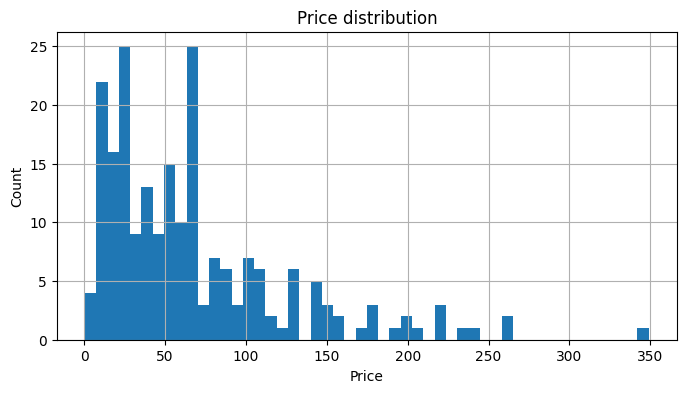

categories
['Patio, Lawn & Garden', 'Outdoor Décor', 'Doormats']                                                                       22
['Home & Kitchen', 'Furniture', 'Living Room Furniture', 'Tables', 'End Tables']                                            21
['Home & Kitchen', 'Home Décor Products', 'Mirrors', 'Wall-Mounted Mirrors']                                                21
['Home & Kitchen', 'Furniture', 'Living Room Furniture', 'Ottomans']                                                        20
['Home & Kitchen', 'Furniture', 'Game & Recreation Room Furniture', 'Home Bar Furniture', 'Barstools']                      18
['Tools & Home Improvement', 'Hardware', 'Bathroom Hardware', 'Towel Bars']                                                 11
['Home & Kitchen', 'Furniture', 'Living Room Furniture', 'Chairs']                                                          10
['Home & Kitchen', 'Furniture', 'Home Office Furniture', 'Home Office Chairs', 'Home Office Desk Cha

In [3]:
import matplotlib.pyplot as plt

# Clean the price column
df['price_clean'] = df['price'].str.replace('$', '', regex=False).astype(float)

# Plot price distribution
plt.figure(figsize=(8,4))
df['price_clean'].dropna().hist(bins=50)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Top categories
print(df['categories'].value_counts().head(20))


In [4]:
# Cell 4: Text embeddings and simple clustering
# Reasoning: We'll embed product combined text and cluster to find groups of similar products.
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

embed_model = SentenceTransformer('all-MiniLM-L6-v2')
df['combined_text'] = df['title'].fillna('') + ' ' + df['description'].fillna('') + ' ' + df['categories'].fillna('')
texts = df['combined_text'].tolist()
embs = embed_model.encode(texts, show_progress_bar=True)

kmeans = KMeans(n_clusters=10, random_state=42).fit(embs)
df['cluster'] = kmeans.labels_

# Show cluster sample products
for i in range(5):
    print("Cluster", i)
    print(df[df['cluster']==i][['title','brand','categories']].sample(3))
    print("-----")

c:\Users\aniket sharma\Music\ai-ml-recommendation\backend\app\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


Cluster 0
                                                 title            brand  \
52   Smlttel Gold Clothing Rack With Shelves, Gold ...    Smlttel Store   
292  MoNiBloom Foldable Storage Free Standing Shoes...  MoNiBloom Store   
234  Soerreo Shoe Slot Storage Box Adjustable Shoe ...          Soerreo   

                                            categories  
52   ['Home & Kitchen', 'Furniture', 'Entryway Furn...  
292  ['Home & Kitchen', 'Storage & Organization', '...  
234  ['Home & Kitchen', 'Storage & Organization', '...  
-----
Cluster 1
                                                 title                 brand  \
77   Delta ARV18-DN Arvo 18-in Wall Mount Towel Bar...                 Delta   
16   Kingston Brass BA1752BB Heritage 18-Inch Towel...  Kingston Brass Store   
282  Kingston Brass SCC8247 Edenscape Pedestal Stee...  Kingston Brass Store   

                                            categories  
77   ['Tools & Home Improvement', 'Hardware', 'Bath...  
16   ['Too